In [4]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [6]:
len(dataset)

60000

In [7]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


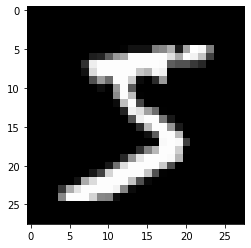

In [10]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


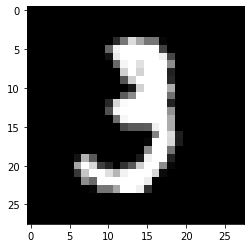

In [11]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [12]:
import torchvision.transforms as transforms

In [13]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [14]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [16]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [19]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0230, -0.0001,  0.0039,  ...,  0.0157,  0.0274,  0.0336],
        [ 0.0313, -0.0285,  0.0091,  ...,  0.0029,  0.0121,  0.0305],
        [ 0.0350, -0.0183,  0.0188,  ..., -0.0322,  0.0296, -0.0049],
        ...,
        [ 0.0322, -0.0348, -0.0159,  ...,  0.0076, -0.0319, -0.0047],
        [ 0.0039,  0.0188, -0.0051,  ..., -0.0026, -0.0252, -0.0194],
        [-0.0212,  0.0318,  0.0159,  ...,  0.0356,  0.0177, -0.0176]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0092, -0.0068,  0.0262,  0.0284, -0.0200,  0.0179, -0.0090,  0.0219,
         0.0192,  0.0070], requires_grad=True)

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [23]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0283, -0.0877,  0.1236, -0.0209, -0.1141, -0.3706, -0.0095, -0.1278,
          0.0191,  0.0234],
        [-0.0960, -0.1285, -0.0835,  0.1551, -0.0902, -0.1130,  0.0586, -0.1667,
         -0.2053,  0.1841]])


In [24]:
import torch.nn.functional as F

In [25]:
outputs[:2]

tensor([[ 0.0283, -0.0877,  0.1236, -0.0209, -0.1141, -0.3706, -0.0095, -0.1278,
          0.0191,  0.0234],
        [-0.0960, -0.1285, -0.0835,  0.1551, -0.0902, -0.1130,  0.0586, -0.1667,
         -0.2053,  0.1841]], grad_fn=<SliceBackward0>)

In [26]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1077, 0.0959, 0.1185, 0.1025, 0.0934, 0.0723, 0.1037, 0.0921, 0.1067,
         0.1072],
        [0.0946, 0.0916, 0.0958, 0.1216, 0.0951, 0.0930, 0.1104, 0.0881, 0.0848,
         0.1251]])
Sum:  1.0000001192092896


In [27]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 9, 1, 3, 1, 6, 4, 4, 2, 6, 3, 3, 1, 4, 4, 1, 4, 7, 2, 3, 6, 4, 6, 6,
        4, 6, 2, 4, 0, 6, 3, 4, 3, 8, 4, 3, 0, 6, 3, 9, 4, 3, 0, 7, 1, 1, 3, 3,
        0, 0, 6, 0, 6, 4, 4, 2, 4, 2, 9, 3, 4, 4, 2, 8, 3, 9, 9, 6, 1, 6, 0, 9,
        2, 7, 2, 9, 9, 3, 7, 3, 8, 9, 6, 4, 1, 1, 6, 6, 4, 3, 0, 3, 7, 0, 6, 4,
        7, 6, 2, 7, 1, 4, 6, 0, 6, 3, 3, 6, 3, 4, 2, 9, 2, 0, 4, 6, 8, 6, 3, 1,
        4, 9, 2, 4, 4, 0, 3, 4])
tensor([0.1185, 0.1251, 0.1308, 0.1113, 0.1420, 0.1189, 0.1313, 0.1361, 0.1230,
        0.1577, 0.1125, 0.1195, 0.1219, 0.1309, 0.1260, 0.1491, 0.1180, 0.1154,
        0.1194, 0.1272, 0.1358, 0.1295, 0.1146, 0.1216, 0.1454, 0.1256, 0.1319,
        0.1182, 0.1251, 0.1192, 0.1105, 0.1332, 0.1257, 0.1147, 0.1371, 0.1116,
        0.1232, 0.1273, 0.1286, 0.1246, 0.1166, 0.1246, 0.1288, 0.1375, 0.1254,
        0.1300, 0.1108, 0.1140, 0.1317, 0.1315, 0.1299, 0.1285, 0.1241, 0.1299,
        0.1461, 0.1365, 0.1486, 0.1375, 0.1149, 0.1297, 0.1317, 0.1229, 0.1149,
       

In [28]:
labels

tensor([1, 4, 2, 1, 2, 6, 0, 4, 9, 9, 1, 7, 7, 7, 4, 2, 8, 7, 3, 1, 9, 8, 3, 6,
        0, 2, 8, 3, 0, 7, 2, 0, 9, 2, 5, 1, 3, 2, 1, 8, 5, 4, 3, 7, 2, 8, 1, 1,
        3, 5, 6, 5, 3, 0, 5, 8, 0, 3, 9, 4, 2, 9, 6, 2, 1, 4, 6, 6, 7, 0, 1, 1,
        2, 9, 8, 5, 6, 9, 1, 7, 1, 1, 1, 3, 2, 0, 2, 6, 2, 1, 5, 9, 4, 8, 6, 4,
        7, 6, 8, 7, 9, 4, 6, 4, 4, 1, 1, 5, 9, 2, 5, 9, 5, 5, 0, 6, 2, 9, 1, 9,
        8, 6, 4, 0, 2, 3, 4, 2])

In [29]:
outputs[:2]

tensor([[ 0.0283, -0.0877,  0.1236, -0.0209, -0.1141, -0.3706, -0.0095, -0.1278,
          0.0191,  0.0234],
        [-0.0960, -0.1285, -0.0835,  0.1551, -0.0902, -0.1130,  0.0586, -0.1667,
         -0.2053,  0.1841]], grad_fn=<SliceBackward0>)

In [30]:
torch.sum(preds == labels)

tensor(21)

In [31]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [32]:
accuracy(outputs, labels)

tensor(0.1641)

In [33]:
probs

tensor([[0.1077, 0.0959, 0.1185,  ..., 0.0921, 0.1067, 0.1072],
        [0.0946, 0.0916, 0.0958,  ..., 0.0881, 0.0848, 0.1251],
        [0.0860, 0.1308, 0.1086,  ..., 0.0659, 0.1045, 0.0856],
        ...,
        [0.1207, 0.0868, 0.0918,  ..., 0.1188, 0.0945, 0.1154],
        [0.0827, 0.0901, 0.1201,  ..., 0.0759, 0.0907, 0.1103],
        [0.0889, 0.1026, 0.1130,  ..., 0.0946, 0.1074, 0.0853]],
       grad_fn=<SoftmaxBackward0>)

In [34]:
outputs

tensor([[ 0.0283, -0.0877,  0.1236,  ..., -0.1278,  0.0191,  0.0234],
        [-0.0960, -0.1285, -0.0835,  ..., -0.1667, -0.2053,  0.1841],
        [-0.1329,  0.2856,  0.1000,  ..., -0.3990,  0.0617, -0.1378],
        ...,
        [ 0.1582, -0.1712, -0.1159,  ...,  0.1420, -0.0861,  0.1131],
        [-0.2511, -0.1651,  0.1220,  ..., -0.3367, -0.1586,  0.0368],
        [-0.1991, -0.0552,  0.0409,  ..., -0.1362, -0.0097, -0.2399]],
       grad_fn=<AddmmBackward0>)

In [35]:
loss_fn = F.cross_entropy

In [36]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2892, grad_fn=<NllLossBackward0>)


In [37]:
def fit(epochs, lr, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [38]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [40]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3083138465881348, 'val_acc': 0.13073575496673584}

In [41]:
history1 = fit(5, 0.001)

Epoch [0], val_loss: 1.9422, val_acc: 0.6142
Epoch [1], val_loss: 1.6761, val_acc: 0.7289
Epoch [2], val_loss: 1.4770, val_acc: 0.7674
Epoch [3], val_loss: 1.3264, val_acc: 0.7859
Epoch [4], val_loss: 1.2106, val_acc: 0.7982


In [42]:
history2 = fit(5, 0.001)

Epoch [0], val_loss: 1.1195, val_acc: 0.8061
Epoch [1], val_loss: 1.0464, val_acc: 0.8130
Epoch [2], val_loss: 0.9866, val_acc: 0.8181
Epoch [3], val_loss: 0.9369, val_acc: 0.8231
Epoch [4], val_loss: 0.8948, val_acc: 0.8259


In [43]:
history3 = fit(5, 0.001)

Epoch [0], val_loss: 0.8588, val_acc: 0.8293
Epoch [1], val_loss: 0.8276, val_acc: 0.8334
Epoch [2], val_loss: 0.8003, val_acc: 0.8358
Epoch [3], val_loss: 0.7761, val_acc: 0.8388
Epoch [4], val_loss: 0.7547, val_acc: 0.8403


In [44]:
history4 = fit(5, 0.001)

Epoch [0], val_loss: 0.7354, val_acc: 0.8425
Epoch [1], val_loss: 0.7180, val_acc: 0.8443
Epoch [2], val_loss: 0.7022, val_acc: 0.8461
Epoch [3], val_loss: 0.6878, val_acc: 0.8472
Epoch [4], val_loss: 0.6746, val_acc: 0.8492


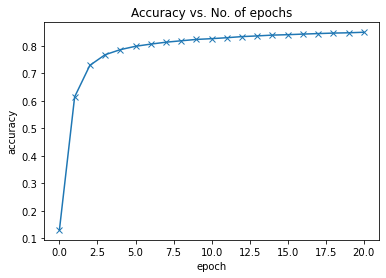

In [45]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [46]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


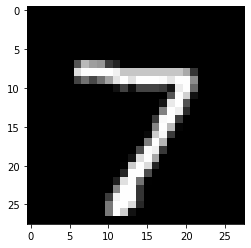

In [47]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [48]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


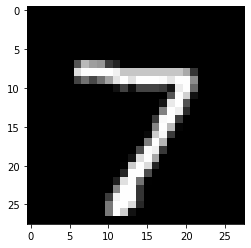

In [49]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


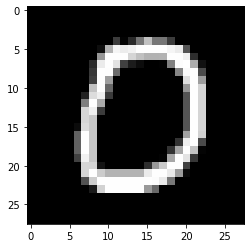

In [50]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


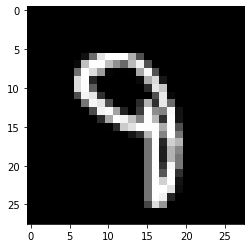

In [51]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


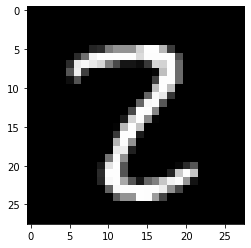

In [54]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [55]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6407485604286194, 'val_acc': 0.8609374761581421}

In [56]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [57]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0142, -0.0347, -0.0139,  ..., -0.0039, -0.0076, -0.0139],
                      [-0.0308,  0.0128, -0.0054,  ...,  0.0288,  0.0224,  0.0037],
                      [-0.0215,  0.0029,  0.0039,  ...,  0.0193, -0.0191,  0.0331],
                      ...,
                      [-0.0305,  0.0277, -0.0170,  ..., -0.0153, -0.0056,  0.0021],
                      [-0.0094, -0.0122,  0.0027,  ..., -0.0231, -0.0054,  0.0004],
                      [-0.0073, -0.0045,  0.0103,  ...,  0.0083,  0.0234, -0.0008]])),
             ('linear.bias',
              tensor([-0.0556,  0.0738, -0.0440,  0.0066,  0.0451,  0.0242, -0.0199,  0.0144,
                      -0.0961, -0.0078]))])